Note: Preparation & Pre Processing menggunakan dataset berikut:
https://www.kaggle.com/datasets/drahulsingh/best-selling-books

In [2]:
# 1. Mengimpor library
import pandas as pd#Library utama untuk memanipulasi dan menganalisis data.
import numpy as np#Library dasar untuk operasi numerik
import matplotlib.pyplot as plt#Library untuk membuat visualisasi data

In [5]:
# 2. Memuat dataset
file_path = "best-selling-books.csv"
df = pd.read_csv(file_path)
#Untuk membaca file CSV yang di upload dan menyimpannya dalam variabel df sebagai DataFrame.
#DataFrame merupakan struktur data yang mirip dengan tabel di spreadsheet.

In [20]:
# 3. Analisis data awal
print("Info Data:")
df.info()#Menampilkan ringkasan informasi dataframe mulai dari jumlah baris, kolom, tipe data setiap kolom, dan jumlah nilai non-null
print("\nLima baris pertama data:")
print(df.head())#Menampilkan 5 baris pertama dari DataFrame, untuk memberikan gambaran tentang isi data dan nama kolom.

Info Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Book                           174 non-null    object 
 1   Author(s)                      174 non-null    object 
 2   Original language              174 non-null    object 
 3   First published                174 non-null    int64  
 4   Approximate sales in millions  174 non-null    float64
 5   Genre                          118 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 8.3+ KB

Lima baris pertama data:
                                       Book                 Author(s)  \
0                      A Tale of Two Cities           Charles Dickens   
1       The Little Prince (Le Petit Prince)  Antoine de Saint-Exupéry   
2  Harry Potter and the Philosopher's Stone             J. K. Rowling   
3                  And Th

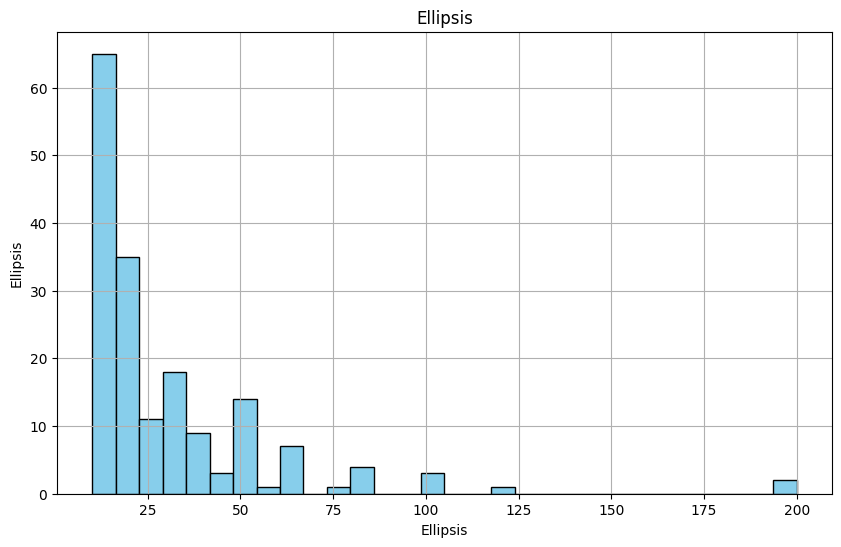

In [7]:
# 4. Histogram awal sebelum menghapus outlier
column_name = 'Approximate sales in millions'
plt.figure(figsize=(10, 6))
plt.hist(df[column_name].dropna(), bins=30, color='skyblue', edgecolor='black')
#plt.hist (Fungsi untuk membuat histogram.)
#(df[column_name].dropna() (Memastikan hanya menggunakan nilai yang ada (tanpa NaN atau Not a Number).)
plt.title(...)
plt.xlabel(...)
plt.ylabel(...)
plt.grid(...)
plt.savefig('histogram_sebelum_outlier_buku.png')#Menyimpan plot sebagai file gambar

In [8]:
# 5. Mendeteksi outlier dengan IQR
Q1 = df[column_name].quantile(0.25)#Menghitung Kuartil Pertama (Q1), yang merupakan nilai di mana 25% data berada di bawahnya.
Q3 = df[column_name].quantile(0.75)#Menghitung Kuartil Ketiga (Q3), yang merupakan nilai di mana 75% data berada di bawahnya.
IQR = Q3 - Q1#Menghitung Interquartile Range, yaitu selisih antara Q3 dan Q1.
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#Menghitung batas-batas outlier menggunakan rumus 1.5 timesIQR.

In [21]:
# 6. Menghapus outlier dan membuat dataframe yang baru
df_cleaned = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
#df_cleaned (teknik filtering di library Pandas.)
#(...) & (...) (kode ini memilih baris di mana nilai kolom Approximate sales in millions berada di antara lower_bound dan upper_bound. Yang memenuhi kedua kondisi ini akan dimasukkan ke dalam DataFrame baru bernama df_cleaned)

Jumlah baris sebelum outlier removal: 174
Jumlah baris setelah outlier removal: 163
Jumlah outlier yang dihapus: 11


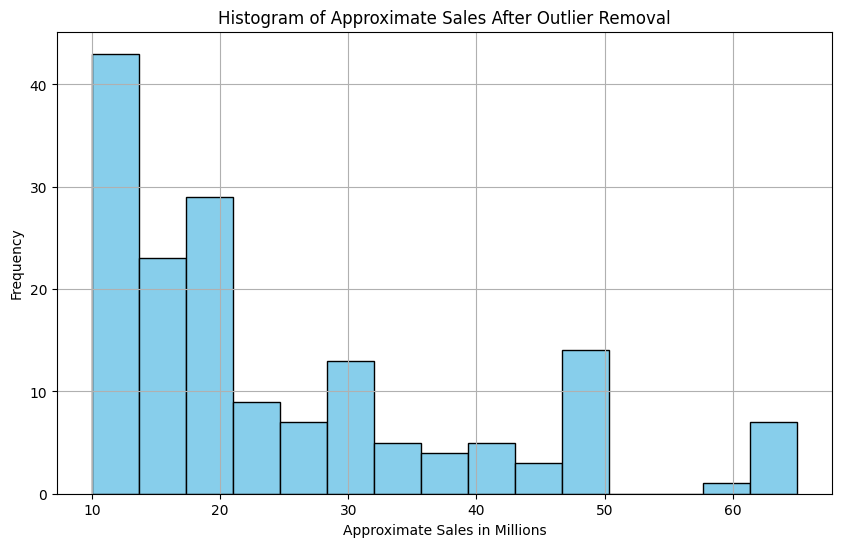

In [19]:
# 7. Visualisasi dan ringkasannya setelah penghapus outlier
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned[column_name].dropna(), bins=15, color='skyblue', edgecolor='black')
plt.title('Histogram of Approximate Sales After Outlier Removal')
plt.xlabel('Approximate Sales in Millions')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('histogram_sesudah_outlier_buku.png')
print(f"Jumlah baris sebelum outlier removal: {len(df)}")
print(f"Jumlah baris setelah outlier removal: {len(df_cleaned)}")
print(f"Jumlah outlier yang dihapus: {len(df) - len(df_cleaned)}")
#Membuat histogram yang sama dengan langkah ke 4 namun menggunakan DataFrame yang sudah dibersihkan (df_cleaned).